In [1]:
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i - 3, '?')
                         for i in train_data[3]])

In [8]:
decoded_newswire

"?thefarmershomeadministrationtheusagriculturedepartment'sfarmlendingarmcouldloseaboutsevenbilliondlrsinoutstandingprincipalonitsseverely?borrowersoraboutonefourthofitsfarmloanportfoliothegeneralaccountingofficegaosaidinremarkspreparedfordeliverytothesenateagriculturecommitteebriancrowleyseniorassociatedirectorofgaoalsosaidthatapreliminaryanalysisofproposedchangesin?financialeligibilitystandardsindicatedasmanyasonehalfof?borrowerswhoreceivednewloansfromtheagencyin1986wouldbe?undertheproposedsystemtheagencyhasproposedevaluating?creditusingavarietyoffinancialratiosinsteadofrelyingsolelyon?abilitysenateagriculturecommitteechairmanpatrickleahydvt?theproposedeligibilitychangestelling?administrator?clarkatahearingthattheywouldmarkadramaticshiftintheagency'spurposeawayfrombeingfarmers'lenderoflastresorttowardbecomingabigcitybankbutclarkdefendedthenewregulationssayingtheagencyhadaresponsibilityto?its70billiondlrloanportfolioina?yet?mannercrowleyofgao??armsaidtheproposedcredit?systemattemptedto

In [9]:
train_labels[10]

3

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
# This code block create control label
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
# history will contain results 
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 2.6287 - accuracy: 0.5223 - val_loss: 1.7188 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 0s 20ms/step - loss: 1.3998 - accuracy: 0.7063 - val_loss: 1.3049 - val_accuracy: 0.7150
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0327 - accuracy: 0.7755 - val_loss: 1.1351 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 0.8132 - accuracy: 0.8252 - val_loss: 1.0135 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.6508 - accuracy: 0.8612 - val_loss: 0.9619 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5209 - accuracy: 0.8953 - val_loss: 0.9164 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 0s 22ms/step - loss: 0.4229 - accuracy: 0.9141 - val_loss: 0.8966 - val_accuracy: 0.8100
Epoch 8/20
16

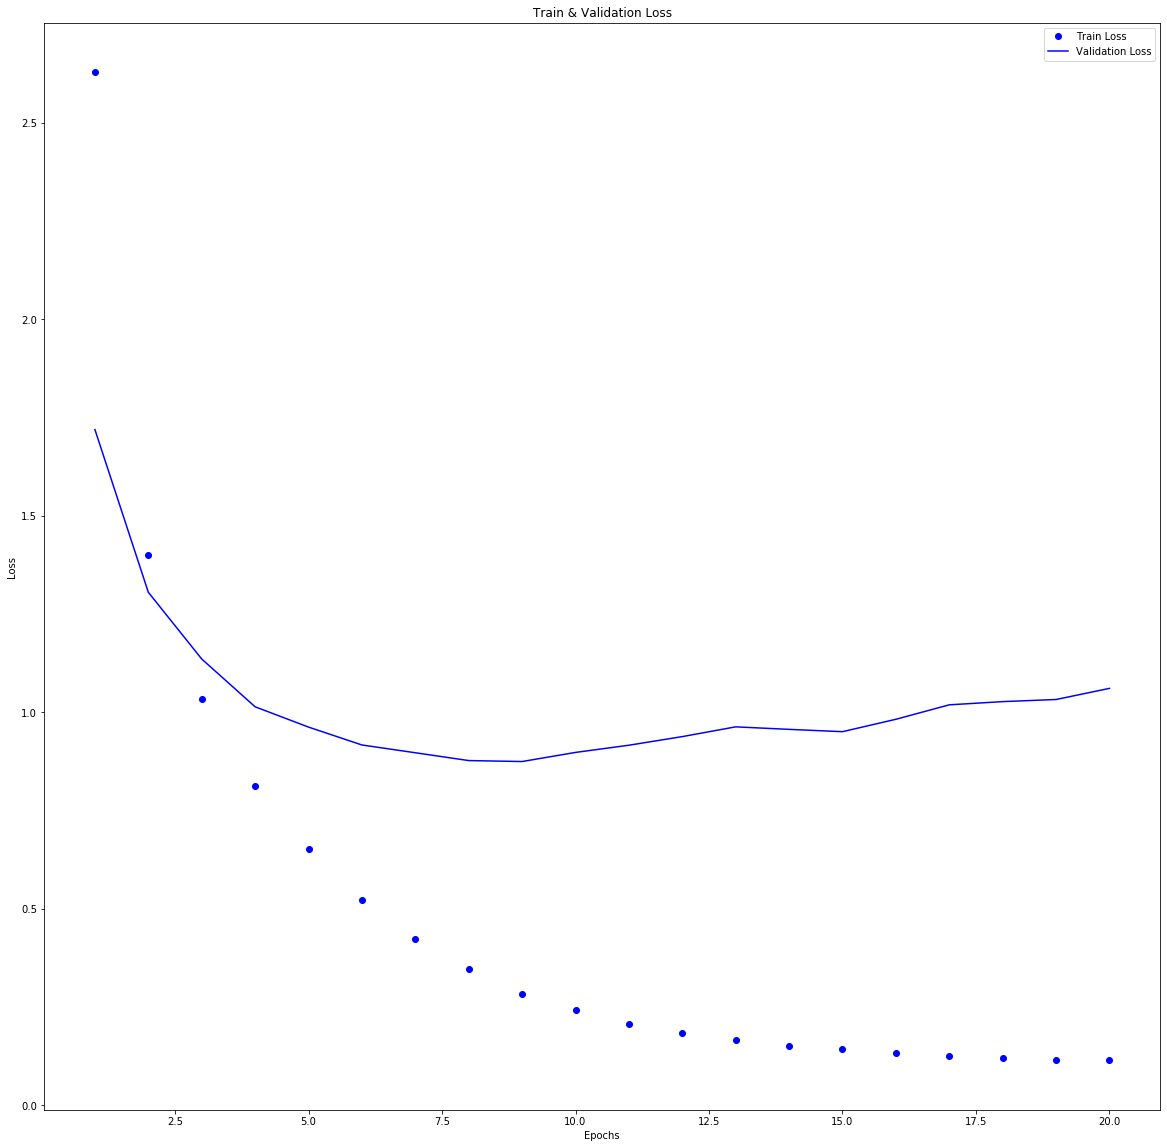

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20, 20))
plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 432x288 with 0 Axes>

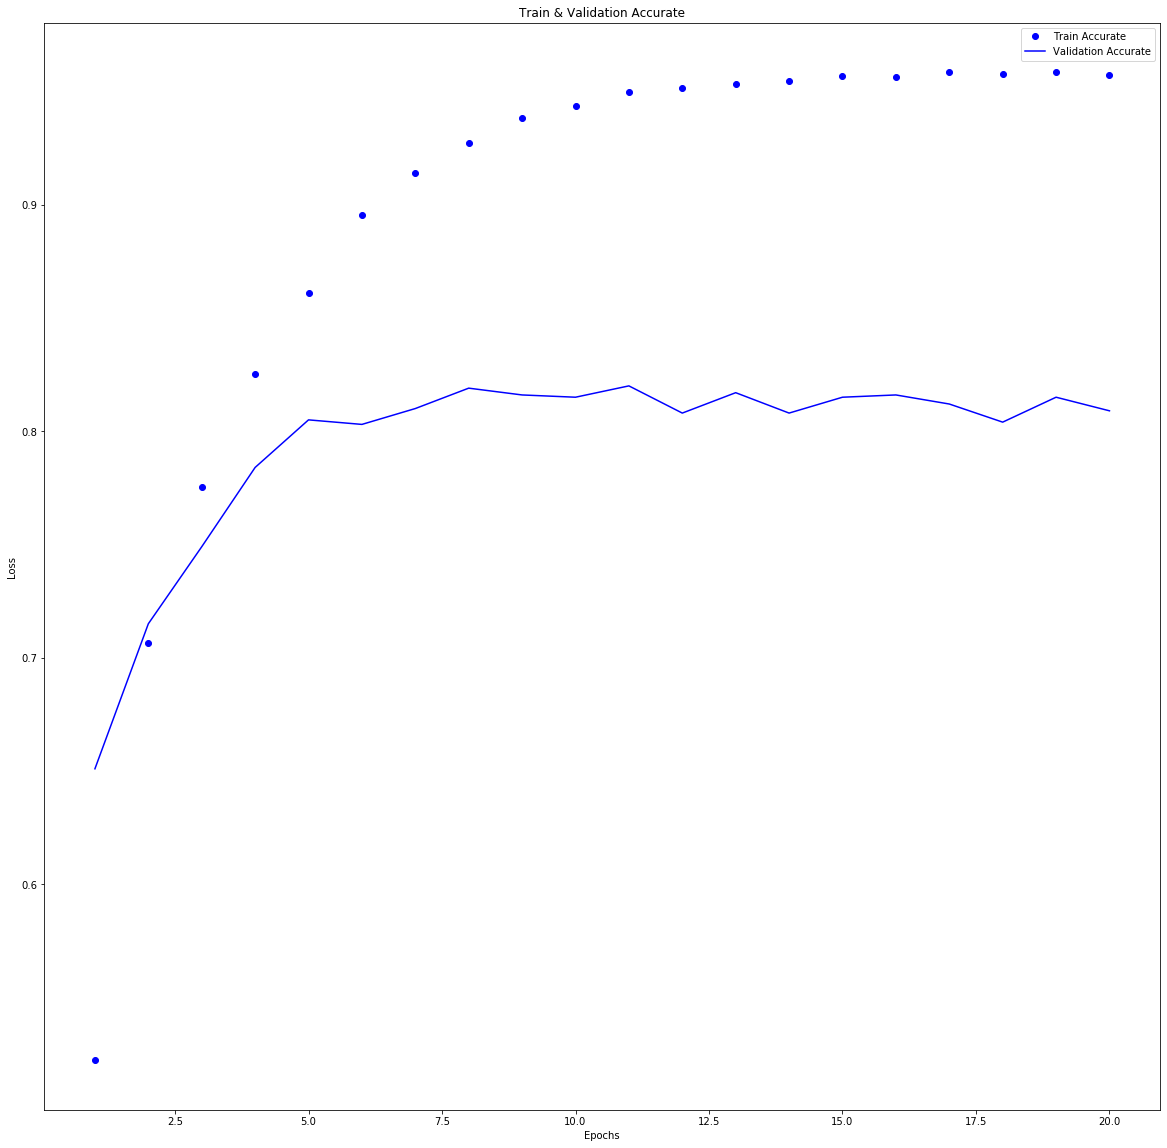

In [17]:
plt.clf()

acc = history.history['accuracy']
acc_val = history.history['val_accuracy']

plt.figure(figsize=(20, 20))
plt.plot(epochs, acc, 'bo', label='Train Accurate')
plt.plot(epochs, acc_val, 'b', label='Validation Accurate')
plt.title('Train & Validation Accurate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
# After 9 epochs the models is overfitted, I will do it again and stopped at 8.

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=8,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 0s 29ms/step - loss: 2.6741 - accuracy: 0.4667 - val_loss: 1.7671 - val_accuracy: 0.6590
Epoch 2/8
16/16 [==============================] - 0s 21ms/step - loss: 1.4265 - accuracy: 0.7057 - val_loss: 1.3409 - val_accuracy: 0.7020
Epoch 3/8
16/16 [==============================] - 0s 24ms/step - loss: 1.0431 - accuracy: 0.7750 - val_loss: 1.1629 - val_accuracy: 0.7330
Epoch 4/8
16/16 [==============================] - 0s 20ms/step - loss: 0.8195 - accuracy: 0.8285 - val_loss: 1.0345 - val_accuracy: 0.7750
Epoch 5/8
16/16 [==============================] - 0s 23ms/step - loss: 0.6481 - accuracy: 0.8632 - val_loss: 0.9659 - val_accuracy: 0.8000
Epoch 6/8
16/16 [==============================] - 0s 22ms/step - loss: 0.5216 - accuracy: 0.8895 - val_loss: 0.9199 - val_accuracy: 0.8060
Epoch 7/8
16/16 [==============================] - 0s 21ms/step - loss: 0.4202 - accuracy: 0.9117 - val_loss: 0.9021 - val_accuracy: 0.8090
Epoch 8/8
71/71 [===

In [21]:
results

[0.9597218036651611, 0.7894033789634705]

# At the end, the model accurate is close to 80%

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0

In [26]:
# probably this sample belongs to class below
np.argmax(predictions[0])

3